# Normal Distribution <hr style = "border:2.5px solid #00ff04ff"></hr>


Ian Benedict L. Depasucat

In [2]:
# imports and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [3]:
# load dataset 
df = pd.read_csv(r'dataset/transformer-voltage-10-sample.csv', 
                 delimiter=",",
                 index_col=["Sample"])
df

,Voltage
Sample,
1,118.3
2,119.2
3,119.7
4,119.5
5,120.0
6,120.1
7,120.2
8,120.8
9,121.5


In [4]:
df.info

<bound method DataFrame.info of         Voltage
Sample         
1         118.3
2         119.2
3         119.7
4         119.5
5         120.0
6         120.1
7         120.2
8         120.8
9         121.5
10        121.8>

In [5]:
df.describe

<bound method NDFrame.describe of         Voltage
Sample         
1         118.3
2         119.2
3         119.7
4         119.5
5         120.0
6         120.1
7         120.2
8         120.8
9         121.5
10        121.8>

In [6]:
alpha=0.05
n = df['Voltage'].count()
t_critical = stats.t.ppf(1-alpha/2,n-1)
t_critical

np.float64(2.2621571628540993)

In [7]:
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

ci_lower, ci_upper = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean,
    scale = std/np.sqrt(n)
)
print(f"CI: [{ci_lower:.2f}, {ci_upper:.2f}]")

CI: [119.36, 120.86]


<function matplotlib.pyplot.show(close=None, block=None)>

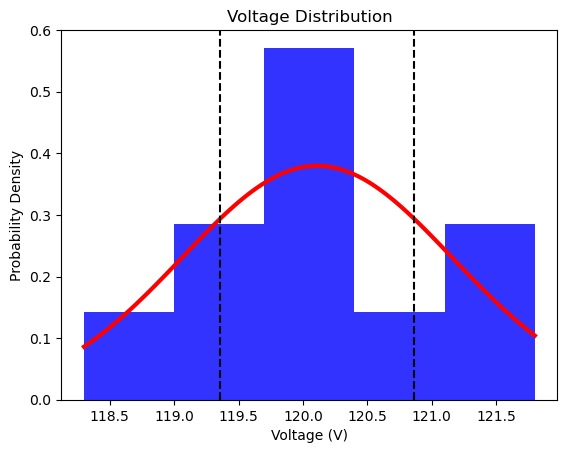

In [8]:
# normal distribution curve
mean = df['Voltage'].mean()
std = df['Voltage'].std(ddof=1)

# x-axis
x_min = df['Voltage'].min()
x_max = df['Voltage'].max()

x = np.linspace(x_min, x_max, 100)
p = stats.norm.pdf(x, mean, std)

plt.plot(x, p,
        color = 'Red',
        linewidth = 3)

plt.hist(df['Voltage'], bins = 5,
         density=True,
         color = 'Blue',
         alpha = 0.8)

plt.title('Voltage Distribution',)
plt.xlabel('Voltage (V)')
plt.ylabel('Probability Density')

plt.axvline(x=ci_lower,
            color = "#000000",
            linestyle = '--')
plt.axvline(x=ci_upper,
            color = "#000000",
            linestyle = '--')
plt.show

# Shoe Inventory <hr style = "border:2.5px solid #00ff04ff"></hr>


In [9]:
# load dataset 
df = pd.read_csv(r'dataset/shoe-inventory.csv', 
                 delimiter=",")
df

,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10


In [10]:
df.shape

(17, 13)

In [11]:
# Mean of Size 6
mean_size_6 = df.iloc[0,1:13].mean()
mean_size_6

np.float64(2.9166666666666665)

In [12]:
# Standard Deviation of Size 6
std_size_6 = df.iloc[0,1:13].std()
std_size_6

1.781640374554423

In [13]:
#  Size 6 95% CI
n = df.shape[1]-1 #return 13 in (17,13)

lower_6, upper_6 = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean_size_6,
    scale = std_size_6/np.sqrt(n)
)

print(f"CI_6:[{lower_6:.2f} , {upper_6:.2f}]")

CI_6:[1.78 , 4.05]


In [14]:
# 95% Confidence Level
mean = df.iloc[0:17,1:13].mean(axis=1)
std = df.iloc[0:17,1:13].std(axis=1)

df[ci_lower], df[ci_upper] = stats.t.interval(
    confidence = 0.95,
    df = n-1,
    loc = mean,
    scale = std/np.sqrt(n)
)
df

d:\Anaconda\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2304: RuntimeWarning: invalid value encountered in multiply
  lower_bound = _a * scale + loc
d:\Anaconda\Lib\site-packages\scipy\stats\_distn_infrastructure.py:2305: RuntimeWarning: invalid value encountered in multiply
  upper_bound = _b * scale + loc


,Size,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec,119.358629,120.861371
0,6.0,4,1,3,1,3,3,3,4,3,7,3,0,1.784666,4.048667
1,6.5,3,2,0,1,0,0,1,7,2,1,2,1,0.445009,2.888324
2,7.0,0,0,1,0,6,4,4,2,3,0,0,0,0.330237,3.003096
3,7.5,3,2,3,1,7,0,7,3,4,6,1,1,1.638094,4.695240
4,8.0,7,9,7,3,12,2,9,4,7,5,2,6,4.139885,8.026782
5,8.5,12,12,8,8,15,9,17,17,6,9,10,6,8.279920,13.220080
6,9.0,17,13,13,11,21,22,25,30,26,25,13,10,14.499984,23.166683
7,9.5,19,25,27,24,26,33,25,47,31,44,37,26,24.946583,35.720084
8,10.0,17,26,26,19,16,31,25,24,23,31,15,20,19.300389,26.199611
9,10.5,13,16,22,14,28,19,18,15,19,21,16,10,14.573064,20.593603


In [15]:
df[ci_lower]= df[ci_lower].fillna(0)
df[ci_upper]= df[ci_upper].fillna(0)

In [17]:
df[ci_lower] = df[ci_lower].astype(int).round(2)
df[ci_upper] = df[ci_upper].astype(int).round(2)

In [18]:
df[['Size', ci_upper]]

,Size,120.861371
0,6.0,4
1,6.5,2
2,7.0,3
3,7.5,4
4,8.0,8
5,8.5,13
6,9.0,23
7,9.5,35
8,10.0,26
9,10.5,20
